In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

import warnings

warnings.filterwarnings("ignore")

2025-12-13 08:48:36.666969: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-12-13 08:48:36.667128: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-12-13 08:48:36.672052: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-12-13 08:48:36.698635: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-13 08:48:40.510367: W tensorflow/compiler/tf2

In [2]:
## Run the NVIDIA System Management Interface provided by provided by NVIDIA for 
# monitoring and managing NVIDIA GPU devices 
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [3]:
# Set seeds

import random

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [4]:
# Check for dataset files
!ls "datasets/Edge-IIoTset/"

 Backdoor.csv		  'OS Fingerprinting.csv'  'SQL Injection.csv'
'Benign Traffic.csv'	  'Password Attack.csv'    'Uploading Attack.csv'
'DDoS HTTP Flood.csv'	  'Port Scanning.csv'	   'Vulnerability Scanner.csv'
'DDoS TCP SYN Flood.csv'   Ransomware.csv	    XSS.csv


In [5]:
# From the above, dataset is saved in 12 CSV files in the "datasets/Edge-IIoTset/" directory
# Walk through the directory to the directory to retrieve all the csv files

import os
import sys


def walk_directory(directory):
    """This function walks through a directory and retrieve all csv files"""
    csv_files = [
        os.path.join(root, file)
        for root, dirs, files in os.walk(directory)
        for file in files if file.endswith(".csv")
    ]
    return csv_files

In [6]:
# Read all files using the function
files = walk_directory(directory="datasets/Edge-IIoTset/")
files

['datasets/Edge-IIoTset/DDoS TCP SYN Flood.csv',
 'datasets/Edge-IIoTset/Uploading Attack.csv',
 'datasets/Edge-IIoTset/XSS.csv',
 'datasets/Edge-IIoTset/DDoS HTTP Flood.csv',
 'datasets/Edge-IIoTset/Password Attack.csv',
 'datasets/Edge-IIoTset/OS Fingerprinting.csv',
 'datasets/Edge-IIoTset/Backdoor.csv',
 'datasets/Edge-IIoTset/Port Scanning.csv',
 'datasets/Edge-IIoTset/Vulnerability Scanner.csv',
 'datasets/Edge-IIoTset/Ransomware.csv',
 'datasets/Edge-IIoTset/Benign Traffic.csv',
 'datasets/Edge-IIoTset/SQL Injection.csv']

In [7]:
# Read and concatenate each file into a Pandas DataFrame

df = pd.concat([pd.read_csv(file) for file in files],
              axis=0, ignore_index=True)

In [8]:
# Display the first five samples
df.head()

,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Flow_Duration,Total_Fwd_Packet,Total_Bwd_packets,Total_Length_of_Fwd_Packet,Total_Length_of_Bwd_Packet,...,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Attack_Name,Label,day_of_week,hour,time_elapsed
0,4119640366,33410,3232235648,80,6,70,1,1,120.0,0.0,...,0.0,0.0,0.0,0.0,0.0,DDoS TCP SYN Flood,1,2,14,285507.0
1,2548826374,33411,3232235648,80,6,21,1,1,120.0,0.0,...,0.0,0.0,0.0,0.0,0.0,DDoS TCP SYN Flood,1,2,14,285507.0
2,3340907903,33412,3232235648,80,6,20,1,1,120.0,0.0,...,0.0,0.0,0.0,0.0,0.0,DDoS TCP SYN Flood,1,2,14,285507.0
3,2069567925,33413,3232235648,80,6,19,1,1,120.0,0.0,...,0.0,0.0,0.0,0.0,0.0,DDoS TCP SYN Flood,1,2,14,285507.0
4,1318530572,33416,3232235648,80,6,27,1,1,120.0,0.0,...,0.0,0.0,0.0,0.0,0.0,DDoS TCP SYN Flood,1,2,14,285507.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3178076 entries, 0 to 3178075
Data columns (total 86 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Src_IP                      int64  
 1   Src_Port                    int64  
 2   Dst_IP                      int64  
 3   Dst_Port                    int64  
 4   Protocol                    int64  
 5   Flow_Duration               int64  
 6   Total_Fwd_Packet            int64  
 7   Total_Bwd_packets           int64  
 8   Total_Length_of_Fwd_Packet  float64
 9   Total_Length_of_Bwd_Packet  float64
 10  Fwd_Packet_Length_Max       float64
 11  Fwd_Packet_Length_Min       float64
 12  Fwd_Packet_Length_Mean      float64
 13  Fwd_Packet_Length_Std       float64
 14  Bwd_Packet_Length_Max       float64
 15  Bwd_Packet_Length_Min       float64
 16  Bwd_Packet_Length_Mean      float64
 17  Bwd_Packet_Length_Std       float64
 18  Flow_Bytes/s                float64
 19  Flow_Packets/s       

In [10]:
### Take only 1000000 sample
df = df.sample(n=1000000, 
               random_state=SEED).sample(frac=1).reset_index(drop=True)

In [11]:
### Get statistical description of numeric features

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Src_IP,1000000.0,2.944666e+09,7.998819e+08,1.684404e+07,3.232236e+09,3.232237e+09,3.232237e+09,4.278124e+09
Src_Port,1000000.0,4.976096e+04,1.522961e+04,0.000000e+00,4.921275e+04,5.428600e+04,5.980500e+04,6.553500e+04
Dst_IP,1000000.0,3.232232e+09,1.705021e+06,2.398800e+09,3.232236e+09,3.232236e+09,3.232237e+09,3.232238e+09
Dst_Port,1000000.0,1.357137e+03,2.115546e+03,8.000000e+01,8.000000e+01,1.883000e+03,1.883000e+03,6.553500e+04
Protocol,1000000.0,6.000000e+00,0.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00
...,...,...,...,...,...,...,...,...
Idle_Min,1000000.0,2.371708e+04,4.922929e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.432782e+07
Label,1000000.0,3.382590e-01,4.731174e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
day_of_week,1000000.0,1.648400e+00,1.408563e+00,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00
hour,1000000.0,1.305045e+01,7.391413e+00,0.000000e+00,8.000000e+00,1.400000e+01,1.900000e+01,2.300000e+01


In [12]:
df.describe(exclude=np.number)

,Attack_Name
count,1000000
unique,12
top,Benign Traffic
freq,661741


In [13]:
# Get the distribution of labels in the dataframe
df.Label.value_counts()

Label
0    661741
1    338259
Name: count, dtype: int64

In [14]:
### Get the distribution of attacks in the dataframe for multiclass classification
class_counts = df.Attack_Name.value_counts()
class_counts

Attack_Name
Benign Traffic           661741
DDoS TCP SYN Flood       265212
Password Attack           56323
DDoS HTTP Flood            4960
Port Scanning              3086
Uploading Attack           2969
SQL Injection              2706
Vulnerability Scanner      1739
XSS                         754
Backdoor                    268
Ransomware                  197
OS Fingerprinting            45
Name: count, dtype: int64

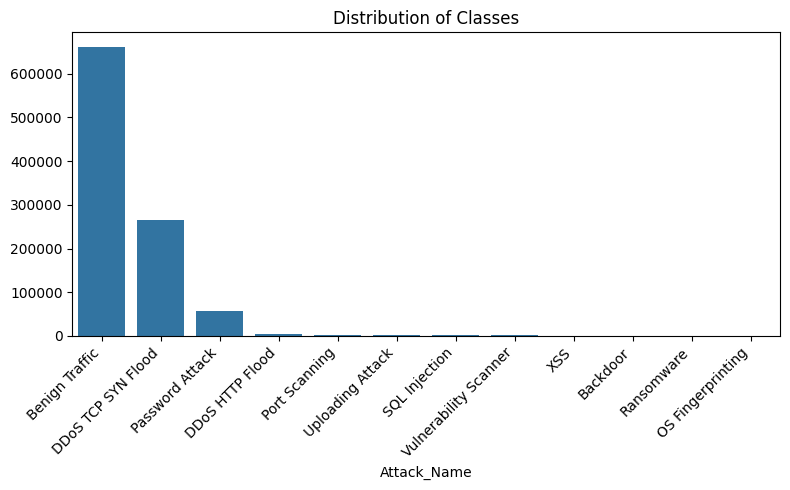

In [15]:
### Visualise the number of samples belonging to each attack

plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Distribution of Classes")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("edge_iiotset_class_distributions.png", dpi=400)
plt.show()

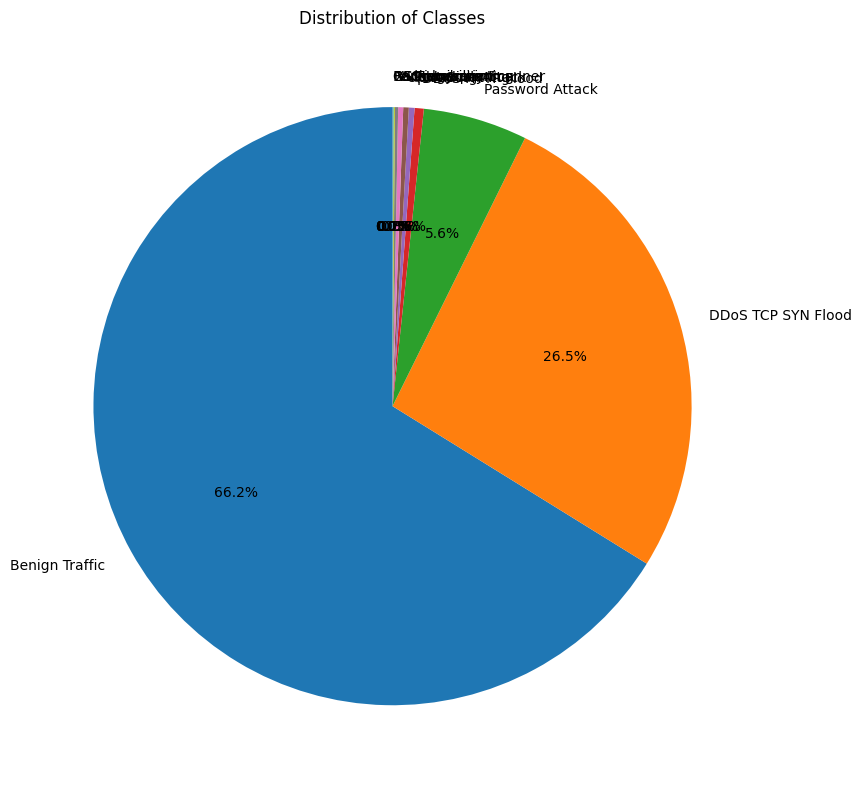

In [16]:
### Create a pie chart to understand the percentage distributions

plt.figure(figsize=(12, 8))
plt.pie(
    x=class_counts.values,
    labels=class_counts.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Distribution of Classes")
plt.tight_layout()
plt.show()

### Preprocessing the Dataset

In [17]:
# Drop the "Label" column
df.drop("Label", axis=1, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 85 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Src_IP                      1000000 non-null  int64  
 1   Src_Port                    1000000 non-null  int64  
 2   Dst_IP                      1000000 non-null  int64  
 3   Dst_Port                    1000000 non-null  int64  
 4   Protocol                    1000000 non-null  int64  
 5   Flow_Duration               1000000 non-null  int64  
 6   Total_Fwd_Packet            1000000 non-null  int64  
 7   Total_Bwd_packets           1000000 non-null  int64  
 8   Total_Length_of_Fwd_Packet  1000000 non-null  float64
 9   Total_Length_of_Bwd_Packet  1000000 non-null  float64
 10  Fwd_Packet_Length_Max       1000000 non-null  float64
 11  Fwd_Packet_Length_Min       1000000 non-null  float64
 12  Fwd_Packet_Length_Mean      1000000 non-null  float64
 13

In [19]:
# Separating predictors from target
X = df.drop("Attack_Name", axis=1)
y = df["Attack_Name"]

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

y_reshaped = y.values.reshape(-1, 1)
onehot_encoder = OneHotEncoder(sparse_output=False)

y = onehot_encoder.fit_transform(y_reshaped)

In [21]:
# # Encode the labels using OneHotEncoder and the ColumnTransformer
# # This is useful when using "Sparse Categorical CrossEntropy Loss Function"

# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder


# # If columns are in a dataframe, use the below
# # Also applicable if they are other columns to be transformed using different transformations
# ct = ColumnTransformer(
#     transformers=[("encoder", OneHotEncoder(), columns=["Attack_Name"])],
#     remainder="passthrough"
# )


# X = ct.fit_transform(X)
# print(X)

In [22]:
# Display the unique labels

np.unique(y)

array([0., 1.])

In [23]:
y.shape

(1000000, 12)

In [24]:
y.ndim

2

In [25]:
# y = y.reshape

In [26]:
# y.shape()

In [27]:
# Split the data into training and test data

from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    # stratify=y, 
                                                    random_state=SEED)

X_val, X_test, y_val, y_test = train_test_split(X_temp,
                                                y_temp, 
                                                test_size=0.5, 
                                                # stratify=y_temp, 
                                                random_state=SEED)

In [28]:
# Print the shapes of the data
print(f"Shape of X_train and y_train: {X_train.shape, y_train.shape}")
print(f"Shape of X_test and y_test: {X_test.shape, y_test.shape}")
print(f"Shape of X_val and y_val: {X_val.shape, y_val.shape}")

Shape of X_train and y_train: ((700000, 84), (700000, 12))
Shape of X_test and y_test: ((150000, 84), (150000, 12))
Shape of X_val and y_val: ((150000, 84), (150000, 12))


In [29]:
# Scale data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

### Build and Train Model
**Using `Sparse Categorical Crossentropy` and `Softmax`**

In [30]:
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Get class names from One-Hot Encoded Input

In [31]:
# Get class names

categories = onehot_encoder.categories_
categories

[array(['Backdoor', 'Benign Traffic', 'DDoS HTTP Flood',
        'DDoS TCP SYN Flood', 'OS Fingerprinting', 'Password Attack',
        'Port Scanning', 'Ransomware', 'SQL Injection', 'Uploading Attack',
        'Vulnerability Scanner', 'XSS'], dtype=object)]

In [32]:
class_names = categories[0]
class_names

array(['Backdoor', 'Benign Traffic', 'DDoS HTTP Flood',
       'DDoS TCP SYN Flood', 'OS Fingerprinting', 'Password Attack',
       'Port Scanning', 'Ransomware', 'SQL Injection', 'Uploading Attack',
       'Vulnerability Scanner', 'XSS'], dtype=object)

In [33]:
# Get the number of classes

num_class = len(np.unique(class_names))
num_class

12

In [34]:
# Get input shape
input_shape = X_train.shape[1], 
input_shape

(84,)

In [35]:
# Model inputs
model_inputs = tf.keras.layers.Input(shape=input_shape, name="input_layer")
x = model_inputs
x

<KerasTensor: shape=(None, 84) dtype=float32 (created by layer 'input_layer')>

In [36]:
# First Dense Layer (Hidden Layer 1)
x = tf.keras.layers.Dense(
    units=32,
    activation="relu",
    kernel_regularizer=tf.keras.regularizers.l2(0.001),
    name="dense_1"
)(x)

x

2025-12-13 08:50:38.140873: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'dense_1')>

In [37]:
# Apply BatchNormalisation and Dropout
x = tf.keras.layers.Dropout(rate=0.2, name="dropout_")(x)
x = tf.keras.layers.BatchNormalization(name="batch_norm_1")(x)
x

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'batch_norm_1')>

In [38]:
# Second Dense Layer (Hidden Layer 2)
x = tf.keras.layers.Dense(
    units=48,
    activation="relu",
    kernel_regularizer=tf.keras.regularizers.l2(0.001),
    name="dense_2"
)(x)

x

<KerasTensor: shape=(None, 48) dtype=float32 (created by layer 'dense_2')>

In [39]:
# Apply BatchNormalisation and Dropout
x = tf.keras.layers.Dropout(rate=0.2, name="dropout_2")(x)
x

<KerasTensor: shape=(None, 48) dtype=float32 (created by layer 'dropout_2')>

In [40]:
## Multiclass classification output
model_outputs = tf.keras.layers.Dense(units=num_class,
                                     activation="softmax",
                                     name="multiclass_output")(x)
model_outputs

<KerasTensor: shape=(None, 12) dtype=float32 (created by layer 'multiclass_output')>

In [41]:
# Build Model
cce_model = tf.keras.models.Model(inputs=model_inputs, 
                                   outputs=model_outputs, 
                                   name="model_outputs")
cce_model

In [42]:
# Get the model summary
cce_model.summary()

Model: "model_outputs"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 84)]              0         
                                                                 
 dense_1 (Dense)             (None, 32)                2720      
                                                                 
 dropout_ (Dropout)          (None, 32)                0         
                                                                 
 batch_norm_1 (BatchNormali  (None, 32)                128       
 zation)                                                         
                                                                 
 dense_2 (Dense)             (None, 48)                1584      
                                                                 
 dropout_2 (Dropout)         (None, 48)                0         
                                                     

In [43]:
# Compile Model
cce_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics="accuracy"
)

In [44]:
# Check the randomly initialised weights
cce_model.weights

[<tf.Variable 'dense_1/kernel:0' shape=(84, 32) dtype=float32, numpy=
 array([[ 0.16292548,  0.07397303, -0.06426665, ..., -0.13638395,
         -0.13204883,  0.2225005 ],
        [-0.17744364, -0.025648  , -0.10685155, ...,  0.14947432,
         -0.05641098,  0.09986767],
        [-0.08365256,  0.12686887, -0.08402057, ..., -0.16785672,
          0.1818012 , -0.05949147],
        ...,
        [ 0.07679811, -0.20868227, -0.07515943, ...,  0.05332199,
          0.00268938,  0.00362153],
        [ 0.1650613 , -0.11484836,  0.10807917, ..., -0.10768973,
          0.21240786, -0.12366074],
        [ 0.20088056,  0.00295377,  0.03384385, ...,  0.02835065,
          0.17797947, -0.1382269 ]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(32,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32)>,
 <tf.Variable 'batch_norm_1/gamma:0' shape=(32,) dtyp

In [45]:
# Get the first hidden layer weights
cce_model.trainable_variables[0]

<tf.Variable 'dense_1/kernel:0' shape=(84, 32) dtype=float32, numpy=
array([[ 0.16292548,  0.07397303, -0.06426665, ..., -0.13638395,
        -0.13204883,  0.2225005 ],
       [-0.17744364, -0.025648  , -0.10685155, ...,  0.14947432,
        -0.05641098,  0.09986767],
       [-0.08365256,  0.12686887, -0.08402057, ..., -0.16785672,
         0.1818012 , -0.05949147],
       ...,
       [ 0.07679811, -0.20868227, -0.07515943, ...,  0.05332199,
         0.00268938,  0.00362153],
       [ 0.1650613 , -0.11484836,  0.10807917, ..., -0.10768973,
         0.21240786, -0.12366074],
       [ 0.20088056,  0.00295377,  0.03384385, ...,  0.02835065,
         0.17797947, -0.1382269 ]], dtype=float32)>

In [46]:
# Get the first hidden layer biases
cce_model.trainable_variables[1]

<tf.Variable 'dense_1/bias:0' shape=(32,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>

In [47]:
# Get the second hidden layer weights
cce_model.trainable_variables[2]

<tf.Variable 'batch_norm_1/gamma:0' shape=(32,) dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32)>

In [48]:
# Get the second hidden layer weights
cce_model.trainable_variables[3]

<tf.Variable 'batch_norm_1/beta:0' shape=(32,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>

In [49]:
# Get the second hidden layer weights
cce_model.trainable_variables[4]

<tf.Variable 'dense_2/kernel:0' shape=(32, 48) dtype=float32, numpy=
array([[ 0.2624445 , -0.00984922,  0.14574784, ...,  0.2640884 ,
        -0.25681743, -0.13930394],
       [-0.15999007, -0.13295661,  0.13829306, ...,  0.2054969 ,
        -0.04627529, -0.24282455],
       [ 0.08855042, -0.09746203,  0.08358368, ...,  0.2392376 ,
        -0.11531153, -0.03608158],
       ...,
       [-0.05221537,  0.2673679 ,  0.07743496, ...,  0.04992747,
        -0.21460283,  0.05165097],
       [-0.2613144 ,  0.04011628, -0.02558681, ...,  0.06221581,
        -0.2503392 ,  0.07810384],
       [ 0.07768145,  0.13112494, -0.22877885, ..., -0.15286261,
        -0.23585485,  0.2256729 ]], dtype=float32)>

In [50]:
# Get the second hidden layer weights
cce_model.trainable_variables[5]

<tf.Variable 'dense_2/bias:0' shape=(48,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>

In [51]:
# Get the second hidden layer weights
cce_model.trainable_variables[6]

<tf.Variable 'multiclass_output/kernel:0' shape=(48, 12) dtype=float32, numpy=
array([[ 0.2168366 , -0.01460475, -0.07445779, -0.19838688, -0.06679696,
         0.2273775 , -0.25534824, -0.03937835, -0.2720388 , -0.24577433,
        -0.10204664,  0.08870864],
       [-0.10599647,  0.31144664,  0.04820186, -0.13100772, -0.0238694 ,
         0.03960055, -0.08095455, -0.01476747, -0.03956035,  0.28679654,
        -0.22114608, -0.16962166],
       [-0.23814183,  0.19696292,  0.1536246 ,  0.04187867,  0.22874704,
        -0.18891777,  0.17703205,  0.16011703, -0.29665625,  0.06549874,
         0.31332573,  0.18638524],
       [ 0.1288994 ,  0.07489184, -0.1304513 , -0.17045635,  0.05172059,
         0.29368696, -0.22181076, -0.24043646,  0.10435665, -0.03471589,
        -0.00061589,  0.17019585],
       [ 0.15597591,  0.27295688, -0.3030521 , -0.07531074, -0.12960131,
         0.06729266, -0.1011097 , -0.2603928 ,  0.14264947, -0.28320825,
         0.17140427,  0.02781254],
       [ 0.25574

In [52]:
# Get the second hidden layer weights
cce_model.trainable_variables[7]

<tf.Variable 'multiclass_output/bias:0' shape=(12,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [53]:
# Define EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",    # Monitor the validation loss
                                                 patience=10,             # Stop after 10 epochs of no improvement
                                                 verbose=1,               # Print a message when early stopping is triggered
                                                 restore_best_weights=True) # Set model weights to the epoch with the best monitored value (lowest val_loss)

In [54]:
# Define Reduce Learning Rate on Plateau
reduce_learning_rate = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  # Quantity to monitor (validation loss)
                                                           factor=0.5,           # Factor by which the learning rate will be reduced (New LR = Old LR * 0.5)
                                                           patience=10,          # Number of epochs with no improvement after which LR is reduced
                                                           min_lr=1e-6,          # Lower bound on the learning rate
                                                           verbose=1)            # Print a message when the learning rate is adjusted

In [55]:
# Confirm the Data Shapes
print(f"\nData shapes:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")


Data shapes:
X_train: (700000, 84), y_train: (700000, 12)
X_val: (150000, 84), y_val: (150000, 12)
X_test: (150000, 84), y_test: (150000, 12)


In [56]:
# Set batch size and number of epochs
EPOCHS = 20
BATCH_SIZE = 1024

In [57]:
# Train the Model using Sparse Categorical Cross Entropy and Softmax
# Define in the Model Architecture Definition and Compile Step

cce_history = cce_model.fit(X_train, y_train,
                             validation_data=(X_val, y_val),
                             epochs=EPOCHS,
                             batch_size=BATCH_SIZE,
                             callbacks=[early_stopping, reduce_learning_rate],
                             verbose=1)

Epoch 1/20
684/684 [==============================] - 14s 15ms/step - loss: 0.2268 - accuracy: 0.9682 - val_loss: 0.0755 - val_accuracy: 0.9959 - lr: 0.0010
Epoch 2/20
684/684 [==============================] - 8s 12ms/step - loss: 0.0568 - accuracy: 0.9953 - val_loss: 0.0405 - val_accuracy: 0.9983 - lr: 0.0010
Epoch 3/20
684/684 [==============================] - 8s 12ms/step - loss: 0.0317 - accuracy: 0.9968 - val_loss: 0.0276 - val_accuracy: 0.9991 - lr: 0.0010
Epoch 4/20
684/684 [==============================] - 8s 12ms/step - loss: 0.0204 - accuracy: 0.9976 - val_loss: 0.0362 - val_accuracy: 0.9988 - lr: 0.0010
Epoch 5/20
684/684 [==============================] - 10s 15ms/step - loss: 0.0150 - accuracy: 0.9980 - val_loss: 0.0202 - val_accuracy: 0.9993 - lr: 0.0010
Epoch 6/20
684/684 [==============================] - 10s 15ms/step - loss: 0.0125 - accuracy: 0.9983 - val_loss: 0.0154 - val_accuracy: 0.9993 - lr: 0.0010
Epoch 7/20
684/684 [==============================] - 9s 13ms

# Model Evaluation

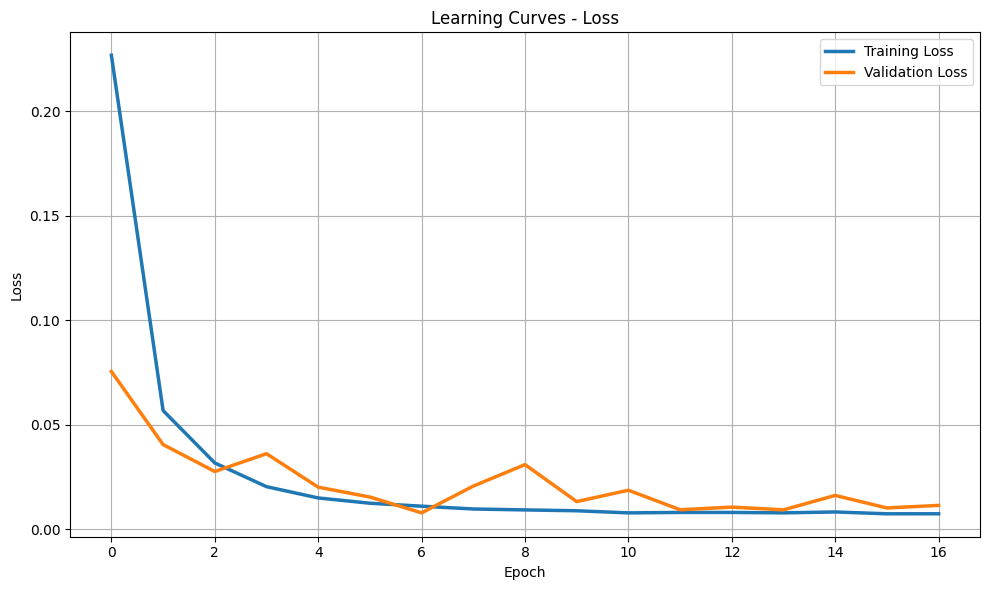

In [58]:
# Visualise the loss curves
if 'loss' in cce_history.history:
    plt.figure(figsize=(10, 6))
    plt.plot(cce_history.history['loss'], label='Training Loss', linewidth=2.5)
    if 'val_loss' in cce_history.history:
        plt.plot(cce_history.history['val_loss'], label='Validation Loss', linewidth=2.5)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Learning Curves - Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

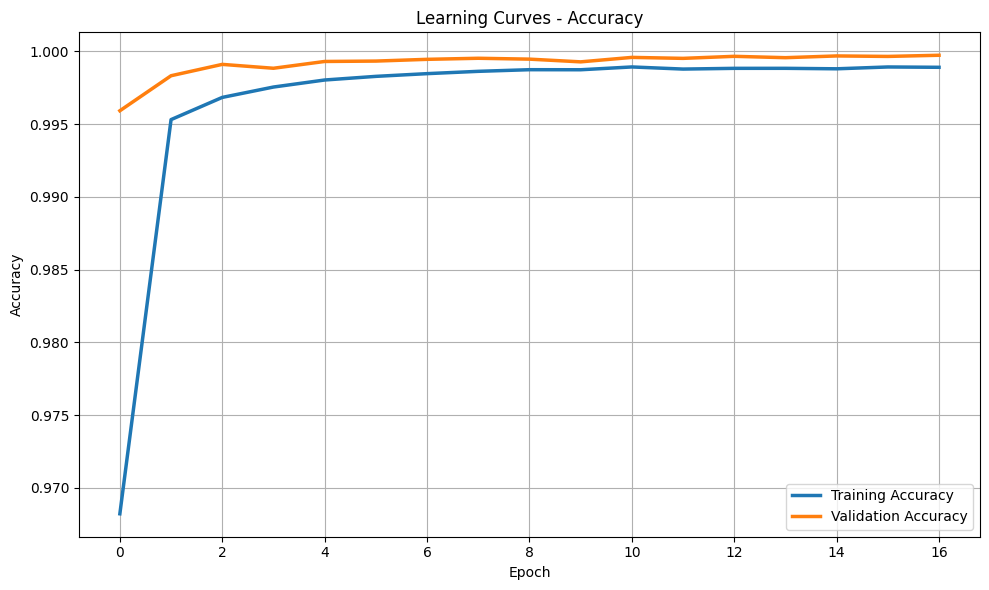

In [59]:
# Visualise the accuracy curve
if 'accuracy' in cce_history.history:
    plt.figure(figsize=(10, 6))
    plt.plot(cce_history.history['accuracy'], label='Training Accuracy', linewidth=2.5)
    if 'val_accuracy' in cce_history.history:
        plt.plot(cce_history.history['val_accuracy'], label='Validation Accuracy', linewidth=2.5)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Learning Curves - Accuracy')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [60]:
# Model predictions (probabilities for each class)

probabilities = cce_model.predict(X_test, verbose=1)

4688/4688 [==============================] - 19s 4ms/step


In [61]:
# Display the probabilities
print(probabilities)

[[4.94359301e-06 9.99952853e-01 3.73795979e-06 ... 5.06329388e-06
  9.55653741e-06 3.48722983e-06]
 [2.31626217e-07 1.25854839e-07 1.62343497e-07 ... 6.67273070e-10
  7.85288918e-08 7.67662289e-09]
 [9.34882246e-06 4.08991218e-06 2.69892753e-05 ... 8.06029493e-06
  6.17891146e-06 1.04270919e-06]
 ...
 [8.49823482e-06 9.99893606e-01 1.42460285e-05 ... 5.79554717e-06
  1.60762502e-05 5.54514781e-06]
 [1.16594383e-05 5.11550343e-06 3.13435812e-05 ... 9.66397602e-06
  7.43718101e-06 1.25725740e-06]
 [6.52989365e-06 2.80872428e-06 2.06338900e-05 ... 5.83638075e-06
  4.35785250e-06 7.14895634e-07]]


In [62]:
# Inspacting the probabilities
print("\nPredicted Probabilities: ")
print(probabilities[0])

print("\nArgmax: ")
print(np.argmax(probabilities[0]))


Predicted Probabilities: 
[4.9435930e-06 9.9995285e-01 3.7379598e-06 2.5050285e-06 6.9352841e-06
 1.5061587e-06 5.8145033e-06 1.8713047e-06 1.5874108e-06 5.0632939e-06
 9.5565374e-06 3.4872298e-06]

Argmax: 
1


In [63]:
print("\nPredicted Probabilities: ")
print(probabilities[1])

print("\nArgmax: ")
print(np.argmax(probabilities[1]))


Predicted Probabilities: 
[2.3162622e-07 1.2585484e-07 1.6234350e-07 4.9925333e-08 3.3742242e-10
 9.9999923e-01 5.0663953e-09 4.4692470e-08 2.3637672e-09 6.6727307e-10
 7.8528892e-08 7.6766229e-09]

Argmax: 
5


In [64]:
print("\nPredicted Probabilities: ")
print(probabilities[10])

print("\nArgmax: ")
print(np.argmax(probabilities[10]))


Predicted Probabilities: 
[6.4312026e-06 9.9993557e-01 6.4301598e-06 4.9000532e-06 1.0721537e-05
 2.4966471e-06 8.2264487e-06 2.6212340e-06 1.8638276e-06 5.3394338e-06
 1.0921538e-05 4.4423036e-06]

Argmax: 
1


In [65]:
print("\nPredicted Probabilities: ")
print(probabilities[1000])

print("\nArgmax: ")
print(np.argmax(probabilities[1000]))


Predicted Probabilities: 
[5.5947467e-06 9.9995488e-01 4.1865646e-06 3.2187297e-06 7.8824341e-06
 2.4159533e-06 5.8521714e-06 2.0992186e-06 1.1507268e-06 3.8915969e-06
 5.9495023e-06 2.8678173e-06]

Argmax: 
1


In [66]:
print("\nPredicted Probabilities: ")
print(probabilities[1000])

print("\nArgmax: ")
print(np.argmax(probabilities[1000]))


Predicted Probabilities: 
[5.5947467e-06 9.9995488e-01 4.1865646e-06 3.2187297e-06 7.8824341e-06
 2.4159533e-06 5.8521714e-06 2.0992186e-06 1.1507268e-06 3.8915969e-06
 5.9495023e-06 2.8678173e-06]

Argmax: 
1


### Step by step evaluation

In [67]:
# y_pred_proba = cce_model.predict(X, verbose=1)

31250/31250 [==============================] - 165s 5ms/step


In [68]:
# Get the shape of Predicted Probabilities, y_test and y_true labels
print(f"Shape of predicted probabilities: {probabilities.shape}")
print(f"Shape of y_test: : {y_test.shape}")

Shape of predicted probabilities: (150000, 12)
Shape of y_test: : (150000, 12)


In [69]:
# Convert Probabilities to Integer Predictions (y_pred)
y_pred = np.argmax(probabilities, axis=1)

In [70]:
# Confirm the shape of y_pred
print(f"Shape of y_pred: : {y_pred.shape}")
# Confirm the shape of y_test
print(f"Shape of y_test: : {y_test.shape}")

Shape of y_pred: : (150000,)
Shape of y_test: : (150000, 12)


In [71]:
# Get the argmax for the y_test
y_test = np.argmax(y_test, axis=1)

In [72]:
# Confirm the shape of y_pred
print(f"Shape of y_pred: : {y_pred.shape}")
# Confirm the shape of y_test
print(f"Shape of y_test: : {y_test.shape}")

Shape of y_pred: : (150000,)
Shape of y_test: : (150000,)


In [73]:
# Get the unique classes in y_test
np.unique(y_test)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [74]:
# Get the unique classes in y_pred
np.unique(y_pred)

array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11])

### Classification Report

In [75]:
from sklearn.metrics import classification_report

print("Classification report: \n")
print(classification_report(y_test, y_pred, digits=4, target_names=class_names))

Classification report: 

                       precision    recall  f1-score   support

             Backdoor     1.0000    0.9535    0.9762        43
       Benign Traffic     0.9998    0.9999    0.9999     98833
      DDoS HTTP Flood     0.9974    0.9936    0.9955       784
   DDoS TCP SYN Flood     1.0000    1.0000    1.0000     40095
    OS Fingerprinting     0.0000    0.0000    0.0000         7
      Password Attack     0.9998    0.9989    0.9994      8544
        Port Scanning     1.0000    1.0000    1.0000       427
           Ransomware     0.9730    1.0000    0.9863        36
        SQL Injection     0.9720    0.9845    0.9782       388
     Uploading Attack     0.9814    0.9958    0.9885       476
Vulnerability Scanner     0.8961    0.9804    0.9363       255
                  XSS     0.9878    0.7232    0.8351       112

             accuracy                         0.9995    150000
            macro avg     0.9006    0.8858    0.8913    150000
         weighted avg     0.

### Multiclass Classification Metrics (for multiclass, use `average=weighted`)

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1_score =f1_score(y_test, y_pred, average="weighted")

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1_score:.4f}")

Accuracy:  0.9995
Precision: 0.9995
Recall:    0.9995
F1 Score:  0.9995


In [77]:
# # Ignoring the average
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1_score =f1_score(y_test, y_pred)

# print(f"Accuracy:  {accuracy:.4f}")
# print(f"Precision: {precision:.4f}")
# print(f"Recall:    {recall:.4f}")
# print(f"F1 Score:  {f1_score:.4f}")

### Confusion Matrix

In [78]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[   41,     0,     1,     0,     0,     0,     0,     1,     0,
            0,     0,     0],
       [    0, 98825,     1,     0,     0,     0,     0,     0,     0,
            0,     6,     1],
       [    0,     5,   779,     0,     0,     0,     0,     0,     0,
            0,     0,     0],
       [    0,     0,     0, 40095,     0,     0,     0,     0,     0,
            0,     0,     0],
       [    0,     7,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0],
       [    0,     8,     0,     0,     0,  8535,     0,     0,     0,
            0,     1,     0],
       [    0,     0,     0,     0,     0,     0,   427,     0,     0,
            0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,    36,     0,
            0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,   382,
            1,     5,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
          474,     2

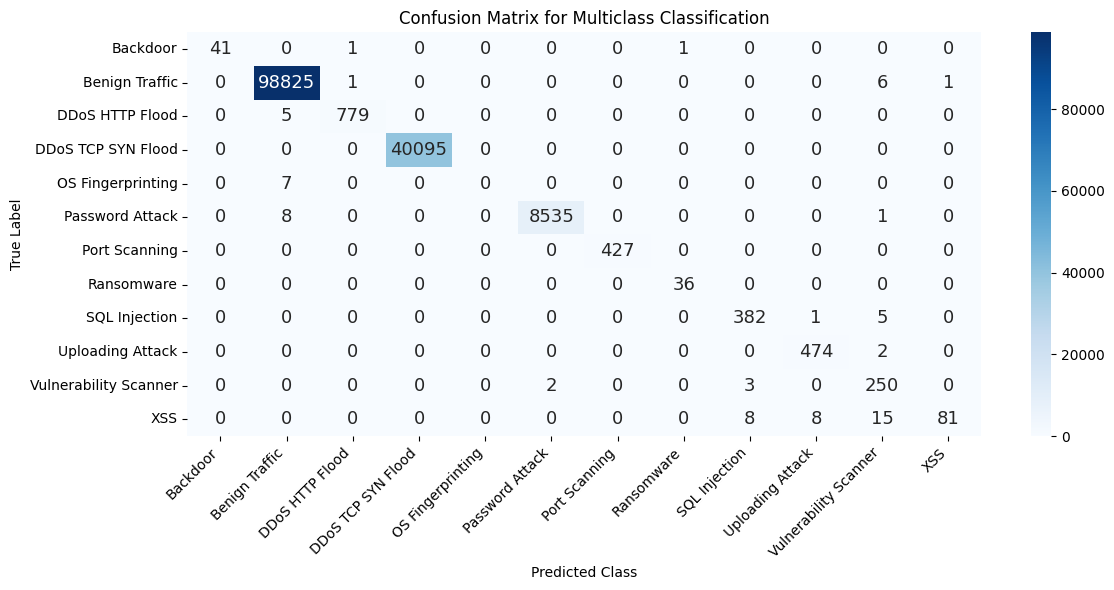

In [79]:
## Visualising the Confusion Matrix
plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=class_names, yticklabels=class_names,
           annot_kws={"fontsize":13})
plt.xlabel("Predicted Class")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Multiclass Classification")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### ROC-AUC and ROC Curves

In [80]:
n_classes = len(class_counts)

In [81]:
print(f"Shape of y_test: {y_test.shape}")
print(f"\nShape of Probabilities: {probabilities.shape}")

Shape of y_test: (150000,)

Shape of Probabilities: (150000, 12)


In [82]:
np.unique(y_test)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

#### Binarize Labels

In [83]:
from sklearn.preprocessing import label_binarize

classes = np.unique(y_test)
y_test_binarize = label_binarize(y_test, classes=classes)

In [84]:
# Verify the binarized output, y_test_binarized should be one-hot encoded
y_test_binarize[0]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [85]:
# This corresponds to the position of the one-hot encoded y_test_binarize
y_test[0]

1

In [86]:
y_test_binarize[1000]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [87]:
y_test[1000]

1

#### ROC and AUC Per Class

In [88]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = len(classes)
print(n_classes)

12


In [89]:
# Compute FPR, TPR, and ROC-AUC per class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarize[:, i], probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

**Verify the `fpr`, `tpr`, `roc_auc`**

In [90]:
fpr[0]

array([0.        , 0.        , 0.        , ..., 0.97362577, 0.97363911,
       1.        ])

In [91]:
tpr[0]

array([0.        , 0.02325581, 0.97674419, ..., 1.        , 1.        ,
       1.        ])

In [92]:
roc_auc[0]

0.9999939517545418

#### Micro and Macro ROC-AUC

In [93]:
from sklearn.metrics import roc_auc_score

# Get Micro ROC-AUC
roc_auc_micro = roc_auc_score(y_test_binarize, probabilities, average="micro")
print(f"ROC-AUC Micro: {roc_auc_micro}")

ROC-AUC Micro: 0.9999775462606059


In [94]:
# Get Macro ROC-AUC
roc_auc_macro = roc_auc_score(y_test_binarize, probabilities, average="macro")
print(f"ROC-AUC Macro: {roc_auc_macro}")

ROC-AUC Macro: 0.9998847125590866


#### Plotting ROC Curve (for each class)

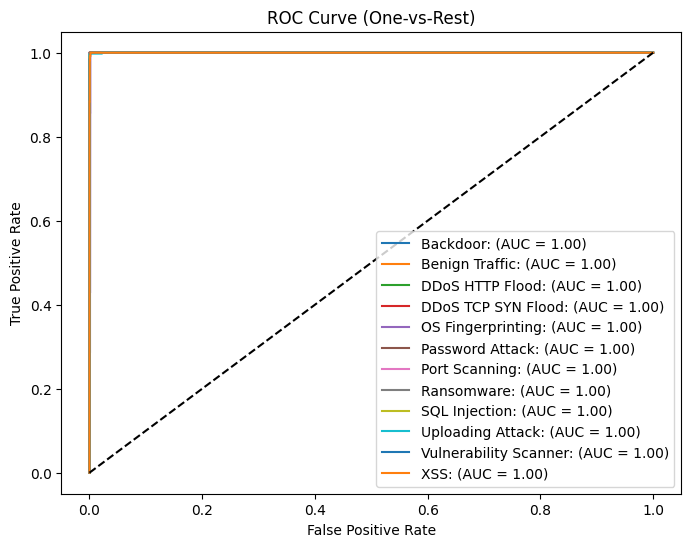

In [95]:
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"{class_names[i]}: (AUC = {roc_auc[i]:0.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC Curve (One-vs-Rest)')
plt.legend()
plt.show()

### PR Curve and PR-AUC

In [96]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision = dict()
recall = dict()
pr_auc = dict()

In [97]:
# Compute Precision, Recall and PR-AUC per class
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarize[:, i],
                                                        probabilities[:, i])
    pr_auc[i] = average_precision_score(y_test_binarize[:, i], probabilities[:, i])

In [98]:
## Compute Micro & Macro PR-AUC
pr_auc_micro = average_precision_score(y_test_binarize, 
                                       probabilities,
                                       average='micro')

pr_auc_macro = average_precision_score(y_test_binarize, 
                                       probabilities,
                                       average='macro')

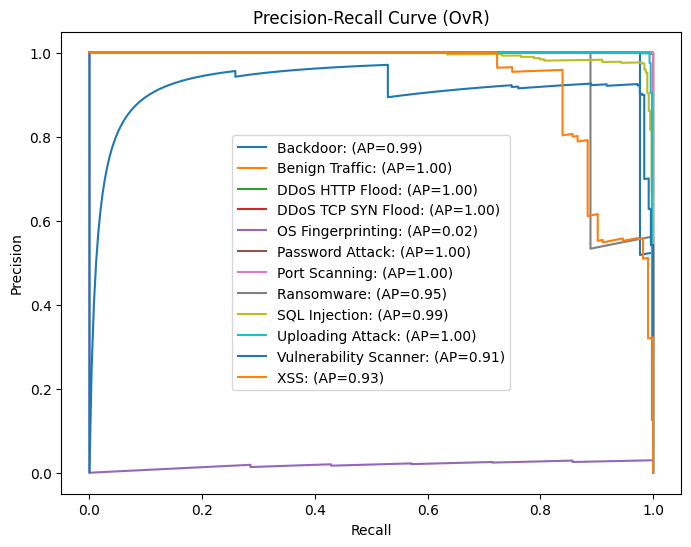

In [99]:
# Plotting PR Curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label=f"{class_names[i]}: (AP={pr_auc[i]:0.2f})")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (OvR)')
plt.legend()
plt.show()